# Coin toss

In [1]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

In [24]:
mu = 0.2
N = 1000

# Take N samples from a binomial distribution with mean mu.
X = np.random.binomial(1, mu, N)
mu_test = np.linspace(0, 1, 1000)

In [14]:
mu_test

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [3]:
def posterior(a, b, X):
    a_n = a + X.sum()
    b_n = b + (X.shape[0] - X.sum())
    
    return beta.pdf(mu_test, a_n, b_n)

In [39]:
a, b = 10, 38
prior_mu = beta.pdf(mu_test, a, b)

Text(0, 0.5, '$p(\\mu|\\mathbf{x})$')

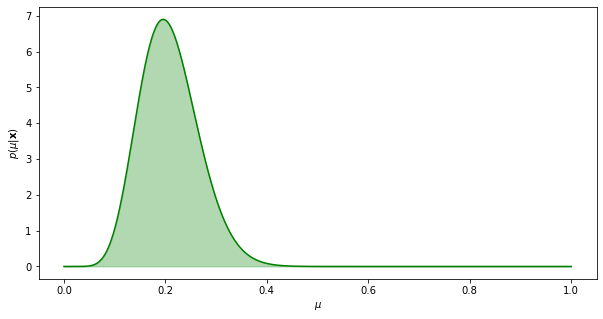

In [40]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)

ax.plot(mu_test, prior_mu, 'g')
ax.fill_between(mu_test, prior_mu, color='green', alpha=0.3)

ax.set_xlabel('$\mu$')
ax.set_ylabel('$p(\mu|\mathbf{x})$')

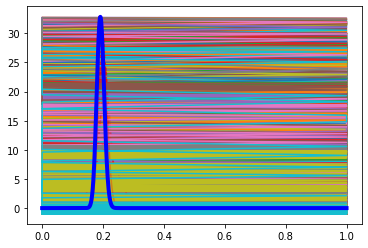

In [49]:
index = np.random.permutation(X.shape[0])
for i in range(0, X.shape[0]):
    y = posterior(a, b, X[:index[i]])
    plt.plot(mu_test, y, 'r', alpha=0.3)
    plt.plot(X, y-mu_test)
    
y = posterior(a, b, X)
plt.plot(mu_test, y, 'b', linewidth=4.0)

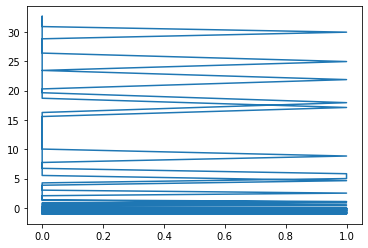

In [46]:
plt.plot(X, y-mu_test)

# Linear regression

In [51]:
import numpy as np
import matplotlib.pyplot as plt

In [52]:
def plot_line(ax, w):
    # Input data.
    X = np.zeros((2, 2))
    X[0, 0] = -5.0
    X[1, 0] = 5.0
    X[:, 1] = 1.0
    
    # Because of the concatenation we have to flip the transpose.
    y = w.dot(X.T)
    ax.plot(X[:, 0], y)

In [94]:
# Create prior distribution.
tau = 1.0 * np.eye(2)
w0 = np.zeros((2, 1))

w0

array([[0.],
       [0.]])

In [101]:
# Sample from prior.
n_samples = 100
w_sample = np.random.multivariate_normal(w0.flatten(), tau, size=n_samples)

w_sample[:5] # This is the prior p(w)

array([[ 2.03383552, -0.61796351],
       [ 0.89801521,  0.32068199],
       [-0.36876833, -0.72514331],
       [ 0.04288028,  1.22990291],
       [ 1.94242972, -1.09411086]])

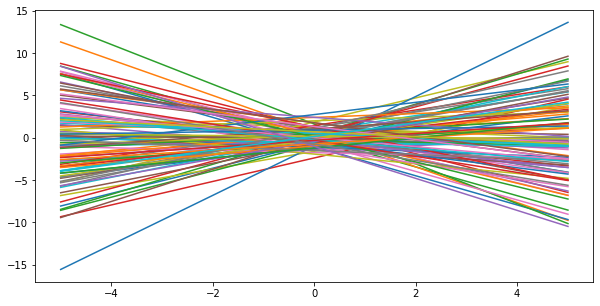

In [96]:
# Create plot.
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)

for i in range(0, w_sample.shape[0]):
    plot_line(ax, w_sample[i, :])

In [114]:
"""
Create a contour plot of a two-dimensional normal distribution.

Parameters
----------
ax : axis handle to plot
mu : mean vector 2x1
Sigma : covariance matrix 2x2

"""
from scipy.stats import multivariate_normal

def plotdistribution(ax, mu, Sigma):
    x = np.linspace(-1.5, 1.5, 100) # Give me 100 equally-distributed numbers between [-1.5, 1.5]
    x1p, x2p = np.meshgrid(x, x) # Not sure!
    pos = np.vstack((x1p.flatten(), x2p.flatten())).T 

    pdf = multivariate_normal(mu.flatten(), Sigma)
    Z = pdf.pdf(pos)
    Z = Z.reshape(100, 100)
    
    ax.set_xlabel('w0')
    ax.set_ylabel('w1')
    ax.contour(x1p, x2p, Z, 5, colors='r', lw=5, alpha=0.7)
    
    plt.show()

In [115]:
plotdistribution(ax, w_sample[:1], tau)

<ipython-input-114-786fa09b9cff>:24: UserWarning: The following kwargs were not used by contour: 'lw'
  ax.contour(x1p, x2p, Z, 5, colors='r', lw=5, alpha=0.7)


In [100]:
index = np.random.permutation(X.shape[0])
for i in range(0, index.shape[0]):
    X_i = X[index, :]
    y_i = y[index]
    
    # Compute posterior.
    
    # Visualise posterior.
    # Visualise samples from posterior with the data.
    # Print out the mean of the posterior.